## Stock Market Comparisons and Forecasting 

The goal of this project is 
-- to compare and analyze stock market prices of the three biggest banks in Sweden and assess which stocks are riskier or rewading to invest in right now.
-- to build a web app that can forecast stock prices of big companies in Sweden using facebook Prophet model.

Prophet is open source software released by Facebook’s Core Data Science team that can be used to make timeseries forecasting.

The steps involved in this project are the following:
- 1. Import the necessary python libraries and packages
- 2. Download the dataset directly from [yahoofinance API](https://finance.yahoo.com/)
- 3. Perform Explanatory analysis and visualization to see market trends 
- 4. Build a model
- 5. Build a web app that can predict stock prices in real time
- 6. Deploy the app on streamlit

The first 4 stages of the project will be done using Jupyter notebook. However The later parts of the project Visual Studio code editor will be used to build web app using streamlit and python.

One of the objective is to compare and analyze stock market prices of the three biggest banks in Sweden. According to Swedish Bankers Association (Svenska Bankföreningen),The three biggest Swedish banks are Swedbank, Handelsbanken and SEB. These banks are the main actors of the financial market.

The period of analysis for this project is from 1st 2008-01-01 to today.

### Import Packages and Libraries

In [112]:
##to download the data from yahoofinance API
import yfinance as yf

#to manipulate the data
import pandas as pd
import numpy as np
import datetime 
from datetime import date

#to visualiza the data
import plotly.io as pio
import plotly.graph_objects as go
pio.templates.default = "plotly_white"
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import cufflinks as cf
cf.go_offline() #will make cufflinks offline
cf.set_config_file(offline=False, world_readable=True)

from plotly.offline import iplot


#to build model and forecast
from prophet import Prophet


import warnings
warnings.filterwarnings("ignore")

### Import the data directly using yahoofinance API

In order to download the data, we need to specify which companies we are interested to get the data using their stock symbols as weel as the start and end date of the period of analysis.

In [2]:
#tickers are symbols that is used to represent the companies on yahoofinace 
Handels_ticker = 'SHB-A.ST'
Swed_ticker = 'SWED-A.ST'
SEB_ticker='SEB-A.ST'

In [8]:
start_date = "2008-01-01"
end_date = date.today().strftime("%Y-%m-%d")

In [14]:
HA_data = yf.download(Handels_ticker, start=start_date, end=end_date)
SW_data = yf.download(Swed_ticker, start=start_date, end=end_date)
SEB_data=yf.download(SEB_ticker, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [81]:
HA_data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'daily_return'], dtype='object')

In [16]:
SW_data.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-11-06,182.850006,183.949997,180.800003,182.850006,182.850006,1783887
2023-11-07,182.399994,183.850006,179.850006,180.149994,180.149994,2134585
2023-11-08,178.300003,181.100006,177.199997,180.000000,180.000000,1727062
2023-11-09,179.199997,180.350006,178.899994,180.149994,180.149994,2255198
2023-11-10,179.600006,181.149994,179.399994,180.050003,180.050003,1328998


### Explanatory Data Analysis and Visualization

Let's combine all the data together using the tickers in order to check the similarites and differences on stocks closing price and volume of shares

In [12]:
bank_tickers=['Handels','Swed','SEB']

In [17]:
bank_data=pd.concat([HA_data,SW_data,SEB_data],axis=1,keys=bank_tickers)

The features that gives the most interest is the closing price of a stock and the volume of shares

In [19]:
bank_data.columns.names=['Bank_Prefix','Movement']

In [20]:
bank_data.head()

Bank_Prefix    Handels                                                        \
Movement          Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2008-01-02   69.000000  69.833336  67.833336  68.333336  38.298965   6733353   
2008-01-03   68.166664  68.333336  67.166664  67.666664  37.925312   5616996   
2008-01-04   67.666664  68.000000  66.000000  66.500000  37.271431   9103095   
2008-01-07   66.833336  67.500000  66.166664  67.000000  37.551670   7368099   
2008-01-08   67.500000  68.500000  66.833336  67.666664  37.925312  10016868   

Bank_Prefix        Swed                                                 \
Movement           Open        High         Low       Close  Adj Close   
Date                                                                     
2008-01-02   150.543243  154.679047  149.716080  150.543243  58.998779   
2008-01-03   149.716080  151.783981  148.061752  150.956818  59.160862   
2008-01-04   150.543243  151.783981  146.821014  146.821014  57.540028   
2008-01-07   146.821014  148.475342  144.339539  145.993851  57.215855   
2008-01-08   147.648178  148.061752  142.685211  144.753113  56.729603   

Bank_Prefix                 SEB                                              \
Movement      Volume       Open       High        Low      Close  Adj Close   
Date                                                                          
2008-01-02   3998589  85.130676  87.959793  84.359100  84.359100  40.641582   
2008-01-03   3870878  84.616295  85.645065  83.073143  85.130676  41.013302   
2008-01-04   3573523  84.873489  85.645065  82.301559  83.073143  40.022057   
2008-01-07   5568018  83.073143  83.587524  81.272797  82.558754  39.774235   
2008-01-08   4237707  83.073143  84.873489  81.529984  83.330330  40.145954   

Bank_Prefix            
Movement       Volume  
Date                   
2008-01-02    5934938  
2008-01-03    6825680  
2008-01-04    6171514  
2008-01-07   12674121  
2008-01-08   10376763

Plot an interactive visualization plot to see the movement of closing price of the three banks over the years

In [25]:
for bank in bank_tickers:
    print('The highest closing price was on: ' , bank, bank_data[bank]['Close'].idxmax())

The highest closing price was on:  Handels 2015-03-02 00:00:00
The highest closing price was on:  Swed 2017-02-17 00:00:00
The highest closing price was on:  SEB 2021-11-12 00:00:00


In [24]:
for bank in bank_tickers:
    print('The lowest closing price was on: ' , bank, bank_data[bank]['Close'].idxmin())

The lowest closing price was on:  Handels 2009-02-02 00:00:00
The lowest closing price was on:  Swed 2009-03-06 00:00:00
The lowest closing price was on:  SEB 2009-03-03 00:00:00


In [23]:
bank_data.xs(key='Close',axis=1,level='Movement').iplot()

From the interactive plot above we can see that all the three banks had a significant dip in stock prices during the same period. During the 2009 finacial crisis ,as well as during the covid-19 period.

Let's now calcualte the daily returns which is the percentage change in daily Closing prices of each banks stocks.

Create a new empty DataFrame called 'daiily_return'. This dataframe contains the returns for the bank's stock. returns are defined by: 

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [29]:
HA_data['daily_return'] = HA_data['Close'].pct_change()
SW_data['daily_return'] = SW_data['Close'].pct_change()
SEB_data['daily_return'] = SEB_data['Close'].pct_change()

Plot the daily returns of the closing stock prices to see the percentage change in prices

In [31]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=HA_data.index, y=HA_data['daily_return'],
                         mode='lines', name='Handels', line=dict(color='blue')))
fig.add_trace(go.Scatter(x=SW_data.index, y=SW_data['daily_return'],
                         mode='lines', name='Swed', line=dict(color='orange')))
fig.add_trace(go.Scatter(x=SEB_data.index, y=SEB_data['daily_return'],
                         mode='lines', name='Swed', line=dict(color='green')))

fig.update_layout(title='Daily Returns for Sweden Bggest Banks Over The last 15 years',
                  xaxis_title='Date', yaxis_title='Daily Return',
                  legend=dict(x=0.02, y=0.95))

fig.show()

We can use plotly to zoom in and out for different periods of time to see the banks performance.

We can now calculate historical volatility of the banks stocks price. Volatility is the standard deviation of the daily returns.

Volatility is a measure of the degree to which price moves. A stock with a price that fluctuates wildly—hits new highs and lows or moves erratically—is considered highly volatile while a stock that maintains a relatively stable price has low volatility. A highly volatile stock is inherently riskier, but that risk cuts both ways. When investing in a volatile security, the chance for success is increased as much as the risk of failure.

In [47]:
Handels_volatility = HA_data['daily_return'].std()
Swed_volatility = SW_data['daily_return'].std()
SEB_volatility = SEB_data['daily_return'].std()

# Create a figure to compare volatility
fig1 = go.Figure()
fig1.add_bar(x=['Handels', 'Swed','SEB'], y=[Handels_volatility, Swed_volatility,SEB_volatility],
             text=[f'{Handels_volatility:.4f}', f'{Swed_volatility:.4f}',f'{SEB_volatility:.4f}'],
             textposition='auto', marker=dict(color=['blue', 'orange','green','red']))

fig1.update_layout(title='Volatility Comparison (15 Years)',
                   xaxis_title='Stock', yaxis_title='Volatility (Standard Deviation)',
                   bargap=0.5)

fig1.show()

In [45]:
market_data = yf.download('^GSPC', start=start_date, end=end_date)  # S&P 500 index as the market benchmark
market_data['daily_return'] = market_data['Close'].pct_change()

cov_Handels= HA_data['daily_return'].cov(market_data['daily_return'])
var_market = market_data['daily_return'].var()

beta_Handels = cov_Handels / var_market

cov_Swed = SW_data['daily_return'].cov(market_data['daily_return'])
beta_Swed = cov_Swed / var_market

cov_SEB = SEB_data['daily_return'].cov(market_data['daily_return'])
beta_SEB = cov_SEB / var_market

[*********************100%%**********************]  1 of 1 completed


In [46]:
print("Beta for Handelsbanken:", beta_Handels)
print("Beta for Swedbank:", beta_Swed)
print("Beta for SEB:", beta_SEB)

Beta for Handelsbanken: 0.6011961028721475
Beta for Swedbank: 0.7835887775871108
Beta for SEB: 0.8125729079118302


Beta measures the expected move in a stock relative to movements in the overall market. A beta greater than 1.0 suggests that the stock is more volatile than the broader market, and a beta less than 1.0 indicates a stock with lower volatility. All the three banks had a beta less than one suggesting low volatility relative to the S&P 500 index.

How do the prices change quickly? In order to do that moving average can be used

A short Moving Average is more sensitive to price changes and can provide traders with more timely signals about changes in the price trend.
A long Moving Average is less sensitive to price changes and can help traders identify the overall trend of the market over a longer period of time.
The combination of short and long MAs is often used by traders and investors to generate trading signals. For example, a rising(bullish) signal is generated when the short MA crosses above the long MA, indicating a potential trend reversal to the upside. Conversely, a falling(bearish) signal is generated when the short MA crosses below the long MA, indicating a potential trend reversal to the downside.

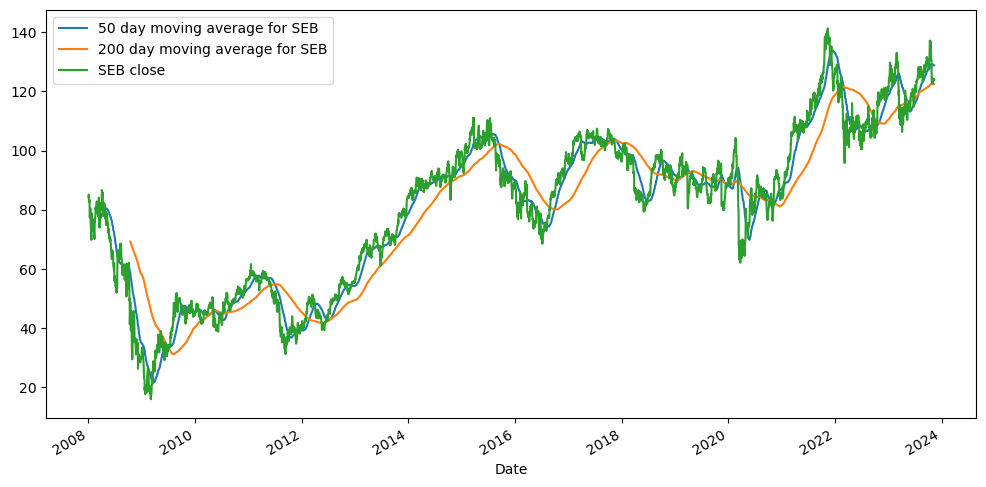

In [60]:
plt.figure(figsize=(12,6))
SEB_data['Close'].rolling(50).mean().plot(label='50 day moving average for SEB')
SEB_data['Close'].rolling(200).mean().plot(label='200 day moving average for SEB')
SEB_data['Close'].plot(label='SEB close')
plt.legend()
plt.show();

In conclusion: SEB stock is considered riskier compared to HandelsBanken and Swedbanken. Investors generally associate higher volatility with higher risk because it implies that the stock price can change significantly in a short period.

Investors with a higher risk tolerance might find SEB’s stock more appealing compared to the other two banksif they are looking for opportunities to profit from short-term price movements.

#### Model Building

Facebook Prophet is a forecasting model developed by Facebook to predict timeseries data. The model is very simple to understand unlike other stock prediction models such as ARIMA or LSTM. It is also reliable accurate and fast.
The main advantage of using this model is that it doesn't require data preprocessing and works well with missing data which is dificult with other ML models
The model uses the features 'Date' (ds) and 'Close' price (y).

Preprocessing by renaming the 'Date' and 'Close' columns to 'ds' and 'y' respectively

In [88]:
modified_HA=HA_data.reset_index()
modified_HA=modified_HA[['Date','Close']]
modified_HA.tail()

,Date,Close
3985,2023-11-06,97.220001
3986,2023-11-07,96.580002
3987,2023-11-08,95.800003
3988,2023-11-09,95.940002
3989,2023-11-10,96.099998


In [91]:
HA_modified=modified_HA.rename(columns={'Date':'ds','Close':'y'})

In [92]:
HA_modified.tail()

,ds,y
3985,2023-11-06,97.220001
3986,2023-11-07,96.580002
3987,2023-11-08,95.800003
3988,2023-11-09,95.940002
3989,2023-11-10,96.099998


##### Create Prophet model

In [113]:
m_HA=Prophet()
m_HA.fit(HA_modified)

02:46:11 - cmdstanpy - INFO - Chain [1] start processing
02:46:15 - cmdstanpy - INFO - Chain [1] done processing


##### Forecasting

Forecast HandelsBanken stock prices for the next 3 months using the model

In [99]:
future_90=m_HA.make_future_dataframe(periods=90)
forecast_90=m_HA.predict(future_90)

In [100]:
forecast_90.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
4075,2024-02-04,100.938704,97.907872,111.648031,100.578936,101.328298,3.669626,3.669626,3.669626,2.020005,2.020005,2.020005,1.649621,1.649621,1.649621,0.0,0.0,0.0,104.608330
4076,2024-02-05,100.947538,94.969880,108.463431,100.565575,101.356056,0.967619,0.967619,0.967619,-0.804584,-0.804584,-0.804584,1.772204,1.772204,1.772204,0.0,0.0,0.0,101.915158
4077,2024-02-06,100.956373,95.629973,109.369803,100.568247,101.377964,1.168318,1.168318,1.168318,-0.728970,-0.728970,-0.728970,1.897288,1.897288,1.897288,0.0,0.0,0.0,102.124692
4078,2024-02-07,100.965208,95.480142,108.804866,100.572695,101.411165,1.234982,1.234982,1.234982,-0.788399,-0.788399,-0.788399,2.023381,2.023381,2.023381,0.0,0.0,0.0,102.200190
4079,2024-02-08,100.974043,95.160705,109.637724,100.559192,101.435199,1.281993,1.281993,1.281993,-0.867074,-0.867074,-0.867074,2.149066,2.149066,2.149066,0.0,0.0,0.0,102.256036


In [111]:
forecast_90[['ds','yhat']].tail() # the predicted price is yhat

,ds,yhat
4075,2024-02-04,104.608330
4076,2024-02-05,101.915158
4077,2024-02-06,102.124692
4078,2024-02-07,102.200190
4079,2024-02-08,102.256036


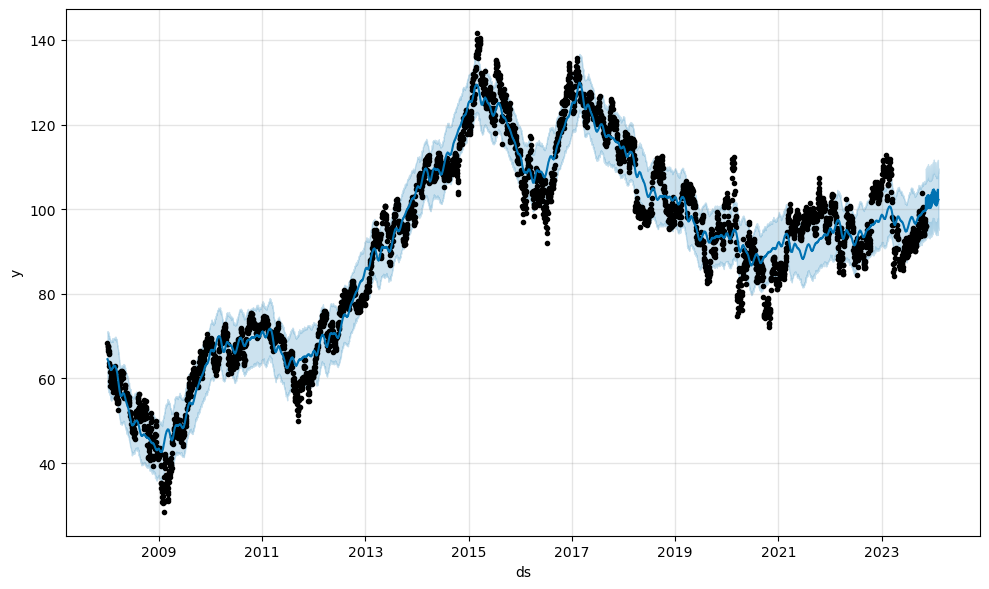

In [108]:
fig1=m_HA.plot(forecast_90,xlabel='ds',ylabel='y')

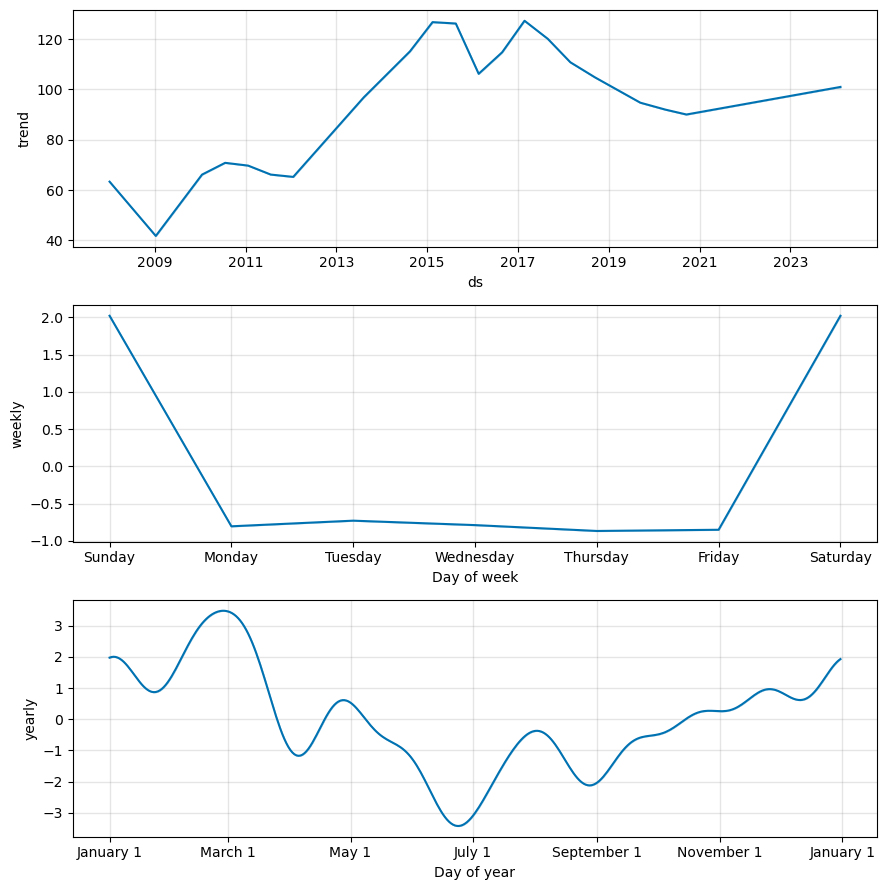

In [110]:
fig2=m_HA.plot_components(forecast_90)

The next step is to build a web app that can predict stock prices. It will be performed using streamlit on Visual Studio Code Editor after that the app is deployed on streamlit